<a href="https://colab.research.google.com/github/babakkeshavarz/time_series/blob/main/VARMA_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -U statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 48.8 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled statsmodels-0.13.5


In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
import statsmodels.tsa.api as VAR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


In [5]:
!wget https://lazyprogrammer.me/course_files/timeseries/temperature.csv

--2023-07-14 14:11:48--  https://lazyprogrammer.me/course_files/timeseries/temperature.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4075992 (3.9M) [text/csv]
Saving to: ‘temperature.csv’

temperature.csv     100%[===================>]   3.89M  2.04MB/s    in 1.9s    

2023-07-14 14:11:51 (2.04 MB/s) - ‘temperature.csv’ saved [4075992/4075992]



In [8]:
df = pd.read_csv('temperature.csv')
df.head()

,record_id,month,day,year,AverageTemperatureFahr,AverageTemperatureUncertaintyFahr,City,country_id,Country,Latitude,Longitude
0,474376,1,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E
1,474377,2,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E
2,474378,3,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E
3,474379,4,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E
4,474380,5,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E


In [13]:
def parse_date(row):
  s = f"{row['year']}-{row['month']}-{row['day']}"
  return datetime.strptime(s , '%Y-%m-%d')

In [14]:
df['Date'] = df.apply(parse_date , axis = 1)

In [15]:
auckland = df[df['City'] == 'Auckland'].copy().dropna()
stockholm = df[df['City'] == 'Stockholm'].copy().dropna()

In [16]:
auckland = auckland[['Date' , 'AverageTemperatureFahr']].copy()
stockholm = stockholm[['Date' , 'AverageTemperatureFahr']].copy()

In [17]:
#set index to date col
auckland.set_index(auckland['Date'] , inplace = True)
auckland.drop('Date', axis = 1 , inplace = True)
auckland.columns = ['AucklandTemp']

In [19]:
#set index to date col
stockholm.set_index(stockholm['Date'] , inplace = True)
stockholm.drop('Date', axis = 1 , inplace = True)
stockholm.columns = ['StockholmTemp']

In [20]:
joined = auckland.join(stockholm , how = 'outer') ## has missing data

In [21]:
joined_part = joined.iloc[-500:].copy()
joined_part.index.freq = 'MS'

In [22]:
joined_part.isna().sum()

AucklandTemp     1
StockholmTemp    4
dtype: int64

In [23]:
joined_part.interpolate(inplace = True)

<Axes: xlabel='Date'>

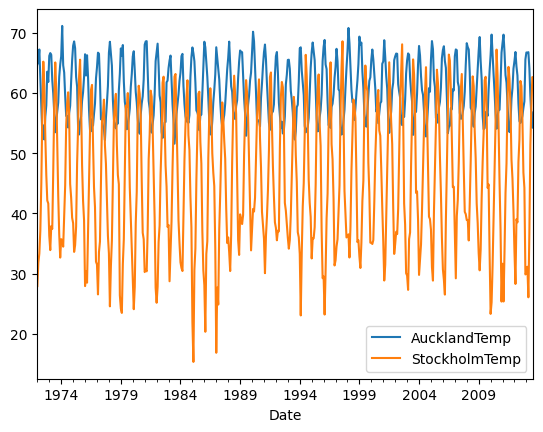

In [24]:
joined_part.plot()

In [25]:
Ntest = 12
train = joined_part.iloc[:-Ntest].copy()
test = joined_part.iloc[-Ntest:].copy()